In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

import DNN

Let's create a small dataset with samples from positive and negative classes.

In [2]:
N = 100
data1a = np.random.multivariate_normal(mean=[0, 0], cov=[[0.5, 0],[0, 0.5]], size=N)
data1b = np.random.multivariate_normal(mean=[2, 2], cov=[[0.5, 0],[0, 0.5]], size=N)
data2a = np.random.multivariate_normal(mean=[0, 2], cov=[[0.5, 0],[0, 0.5]], size=N)
data2b = np.random.multivariate_normal(mean=[2, 0], cov=[[0.5, 0],[0, 0.5]], size=N)

data = np.concatenate((data1a, data1b, data2a, data2b), axis=0)
# Arrays are explicitly defined as (N x 1) for convenience allowing generlizations to netowrks with multidimensional outputs
labels = np.concatenate((np.ones((2*N, 1)), np.zeros((2*N, 1))), axis=0)


Let's define a multiple layer network to learn the XOR function.

In [28]:
# instantiate an empty network  
my_net = DNN.Net()
# add layers to my_net in a bottom up fashion
my_net.addLayer(n_in=2, n_out=4, activation='relu')
my_net.addLayer(n_out=1, activation='sigmoid')

# create solver object for training the feedforward network 
solver_params = {'lr_rate': 0.01,  \
                 'momentum': 0.9,  \
                 'solver': 'sgd'}
my_solver = DNN.Solver(solver_params)

# instantiate a NetTrainer to learn parameters of my_net using the my_solver 
train_params = {'net': my_net, \
                'loss_func': 'xent', \
                'batch_size': 10,  \
                'max_iter': 100000, \
                'train_data': data, \
                'label_data': labels, \
                'solver': my_solver, \
                'print_interval': 10000}
my_trainer = DNN.NetTrainer(train_params)

In [29]:
my_trainer.train()

Iteration 0, objective = 0.674660
Iteration 10000, objective = 0.214476
Iteration 20000, objective = 0.693742
Iteration 30000, objective = 0.365025
Iteration 40000, objective = 0.400644
Iteration 50000, objective = 0.223337
Iteration 60000, objective = 0.369013
Iteration 70000, objective = 0.339811
Iteration 80000, objective = 0.505224
Iteration 90000, objective = 0.511015


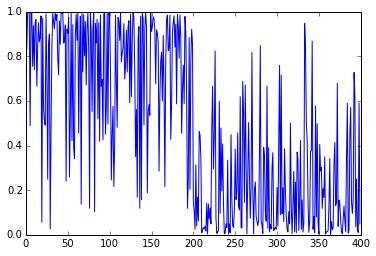

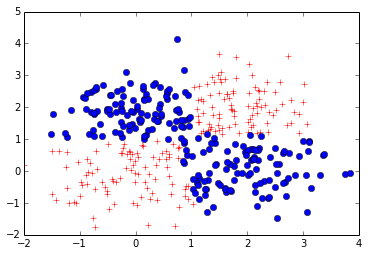

In [30]:
my_net.forward(data)
plt.plot(my_net.Xout)
plt.show()

pred_labels = np.reshape(my_net.Xout > 0.5, -1)
plt.plot(data[pred_labels, 0], data[pred_labels, 1], 'r+')
plt.hold
plt.plot(data[np.logical_not(pred_labels), 0], data[np.logical_not(pred_labels), 1], 'bo')
